<a href="https://colab.research.google.com/github/Ni-cole17/Imersao-DataScienceAlura/blob/main/Aula3_Desafios_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true',compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [ ]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)
dados.head()


,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##**Desafio 1: Criar tabelas de frequencia com o pandas.groupby()**

As tabelas de frequencia exploradas na aula foram feitas com o pandas crosstab

In [ ]:
pd.crosstab(dados['dose'],dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


O pandas.groupby também é uma forma de agrupamento de dados, podendo ter a aplicação de funções e combinação de resultados.

In [ ]:
dados.groupby([dados['tratamento'],dados['tempo']],sort = True).mean()

g-0       g-1       g-2  ...      c-97      c-98      c-99
tratamento   tempo                                ...                              
com_controle 24    -0.119637 -0.340647  0.241432  ...  0.156828  0.241622  0.226405
             48    -0.058786 -0.239302 -0.084079  ...  0.230692  0.325725  0.318349
             72    -0.113108 -0.269072 -0.264560  ...  0.093519  0.290589  0.242814
com_droga    24     0.241695 -0.126326  0.383142  ... -0.261335 -0.297678 -0.202118
             48     0.318944 -0.075769  0.148428  ... -0.442619 -0.563793 -0.355848
             72     0.269890 -0.037771 -0.024805  ... -0.567086 -0.740223 -0.490057

[6 rows x 872 columns]

Na tabela acima, foi relacionado a coluna tratamento com o restante da tabela, obtendo os resultados da media de valores de cada coluna. 

In [ ]:
dados.groupby(by = ['dose'])['tempo'].value_counts().unstack()

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [ ]:
dados.groupby(by = ['dose','tempo'])['tratamento'].value_counts().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
dados.groupby(by = ['dose','tempo'])['tratamento'].value_counts(normalize = True).unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Na tabela acima os valores estão normalizados por cada linha.

In [ ]:
dados.groupby(by = ['dose','tempo'])['g-1'].value_counts(normalize = True)

dose  tempo  g-1   
D1    24     -1.289    0.001029
             -1.966    0.000772
             -1.930    0.000772
             -1.895    0.000772
             -1.324    0.000772
                         ...   
D2    72      3.890    0.000257
              3.918    0.000257
              4.158    0.000257
              4.180    0.000257
              4.676    0.000257
Name: g-1, Length: 21289, dtype: float64

##**Desafio 2: Normalizar a tabela feita com o crosstab pela coluna**

In [ ]:
pd.crosstab([dados['dose'],dados['tempo']], dados['tratamento'], normalize =  'columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

  Ao passar o parametro columns para o normalize, conseguimos atingir o objetivo do desafio.

##**Desafio 3: Explorar outros agregadores.**

In [ ]:
pd.crosstab(dados['dose'],[dados['tempo'],dados['tratamento']])

tempo                24                     48                     72          
tratamento com_controle com_droga com_controle com_droga com_controle com_droga
dose                                                                           
D1                  301      3585          343      4011          307      3600
D2                  305      3581          305      3591          305      3580

In [ ]:
pd.crosstab(dados['dose'],[dados['tempo'],dados['tratamento']],rownames=['tempo'],colnames = ['dose','tratamento'])

dose                 24                     48                     72          
tratamento com_controle com_droga com_controle com_droga com_controle com_droga
tempo                                                                          
D1                  301      3585          343      4011          307      3600
D2                  305      3581          305      3591          305      3580

In [ ]:
pd.crosstab(dados['dose'],[dados['tempo'],dados['tratamento']],rownames=['tratamento'],colnames = ['dose','tempo'])

dose                 24                     48                     72          
tempo      com_controle com_droga com_controle com_droga com_controle com_droga
tratamento                                                                     
D1                  301      3585          343      4011          307      3600
D2                  305      3581          305      3591          305      3580

Rownames e colnames alteram somente o nome das linhas e colunas, sem de fato alterar os valores da tabela, visto que eles são definidos no index e no columns

In [ ]:
pd.crosstab(dados['dose'],dados['tempo'],values = dados['g-0'],aggfunc = 'mean' )

tempo,24,48,72
dose,,,
D1,0.319991,0.370304,0.240556
D2,0.107051,0.198721,0.239057


Para utilizar o parametro aggfunc temos que atribuir uma lista de valores para o parametro values, e atribuir uma função a ser calculada com esses valores.

In [ ]:
pd.crosstab([dados['dose'],dados['tratamento']],dados['tempo'],margins = True,margins_name = 'Total',normalize = 'all')

tempo                     24        48        72     Total
dose  tratamento                                          
D1    com_controle  0.012640  0.014403  0.012892  0.039934
      com_droga     0.150542  0.168430  0.151172  0.470144
D2    com_controle  0.012808  0.012808  0.012808  0.038423
      com_droga     0.150374  0.150794  0.150332  0.451499
Total               0.326363  0.346435  0.327202  1.000000

Margins adiciona a soma de cada linha e cada coluna e um total, o normalize quando deixado como all normaliza considerando todos os valores, por isso está indicando numero 1 no encontro da coluna total com a linha total.

In [ ]:
pd.crosstab([dados['dose'],dados['tratamento']],dados['tempo'],values = dados['g-0'],aggfunc = 'mean',margins = True,margins_name = 'Total')

tempo                     24        48        72     Total
dose  tratamento                                          
D1    com_controle -0.251760 -0.122773 -0.295271 -0.219284
      com_droga     0.367996  0.412469  0.286250  0.357644
D2    com_controle  0.010754  0.013174  0.070250  0.031393
      com_droga     0.115253  0.214480  0.253439  0.194404
Total               0.213521  0.289275  0.239809  0.248366

In [ ]:
pd.crosstab([dados['dose'],dados['tratamento']],dados['tempo'],values = dados['g-0'],aggfunc = 'std',margins = True,margins_name = 'Total')

tempo                     24        48        72     Total
dose  tratamento                                          
D1    com_controle  0.751395  0.853396  0.769294  0.797913
      com_droga     1.461954  1.693903  1.458600  1.548783
D2    com_controle  0.836626  0.836845  0.878041  0.850241
      com_droga     1.044999  1.315476  1.451532  1.283067
Total               1.250379  1.491185  1.420383  1.393399

In [ ]:
pd.crosstab([dados['dose'],dados['tratamento']],dados['tempo'],values = dados['g-0'],aggfunc = 'var',margins = True,margins_name = 'Total')

tempo                     24        48        72     Total
dose  tratamento                                          
D1    com_controle  0.564594  0.728284  0.591814  0.636665
      com_droga     2.137311  2.869308  2.127514  2.398728
D2    com_controle  0.699943  0.700310  0.770956  0.722909
      com_droga     1.092022  1.730477  2.106944  1.646262
Total               1.563447  2.223634  2.017487  1.941560

Nas tabelas acima foi explorado diferentes funções que podem fornecer valores estatísticos relevantes para a análise dos dados. 

##**Desafio 4: Explorar o melt.**

In [ ]:
lista = dados.loc[:,'g-0':'g-8']
lista

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789
...,...,...,...,...,...,...,...,...,...
23809,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726
23810,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112
23811,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340
23812,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299


In [ ]:
pd.melt(dados,id_vars = ['tratamento'],value_vars = lista,var_name = 'Célula',value_name = 'Resultado')

,tratamento,Célula,Resultado
0,com_droga,g-0,1.0620
1,com_droga,g-0,0.0743
2,com_droga,g-0,0.6280
3,com_droga,g-0,-0.5138
4,com_droga,g-0,-0.3254
...,...,...,...
214321,com_droga,g-8,-0.4726
214322,com_droga,g-8,0.5112
214323,com_controle,g-8,-0.0340
214324,com_droga,g-8,0.4299


In [ ]:
df1 = pd.melt(dados,id_vars = ['composto'])
df1

,composto,variable,value
0,b68db1d53,id,id_000644bb2
1,df89a8e5a,id,id_000779bfc
2,18bb41b2c,id,id_000a6266a
3,8c7f86626,id,id_0015fd391
4,7cbed3131,id,id_001626bd3
...,...,...,...
20861059,df1d0a5a1,c-99,0.468
20861060,ecf3b6b74,c-99,0.3689
20861061,cacb2b860,c-99,0.3808
20861062,8b87a7a83,c-99,0.074


In [ ]:
df1[df1['variable']=='g-0']

,composto,variable,value
95256,b68db1d53,g-0,1.062
95257,df89a8e5a,g-0,0.0743
95258,18bb41b2c,g-0,0.628
95259,8c7f86626,g-0,-0.5138
95260,7cbed3131,g-0,-0.3254
...,...,...,...
119065,df1d0a5a1,g-0,0.1394
119066,ecf3b6b74,g-0,-1.326
119067,cacb2b860,g-0,0.3942
119068,8b87a7a83,g-0,0.666


O melt é um método que transforma nossa tabela em um novo formato,em que algumas colunas são consideradas como variaveis e outras com os valores encontrados na coluna da tabela inicial.

In [ ]:
df1 = pd.melt(dados,id_vars = ['composto'],var_name = 'Célula',value_name = 'Resultado')
df1[df1['Célula']=='g-0']

,composto,Célula,Resultado
95256,b68db1d53,g-0,1.062
95257,df89a8e5a,g-0,0.0743
95258,18bb41b2c,g-0,0.628
95259,8c7f86626,g-0,-0.5138
95260,7cbed3131,g-0,-0.3254
...,...,...,...
119065,df1d0a5a1,g-0,0.1394
119066,ecf3b6b74,g-0,-1.326
119067,cacb2b860,g-0,0.3942
119068,8b87a7a83,g-0,0.666


##**Desafio 5: Calcular e analisar a correlação entre o g e c da base de dados**

In [ ]:
dados

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4

In [ ]:
gen = dados.loc[:,'g-0':'g-50']
cel = dados.loc[:,'c-0':'c-50']
correlacao = pd.concat([gen, cel], axis=1)
corre = correlacao.corr().loc['c-0':'c-50','g-0':'g-50']
corre

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
c-0,-0.624116,-0.037405,-0.168656,-0.037342,-0.403545,0.209358,-0.103316,0.486478,0.621422,0.435235,0.586035,-0.231425,0.345752,-0.455353,0.468143,0.041219,0.568077,0.511811,-0.032060,0.078310,0.443028,0.108853,0.085712,0.152211,0.456591,0.330978,0.496350,-0.177204,0.558456,0.367153,0.656611,-0.692572,0.211714,-0.084536,0.256107,-0.269916,0.145813,0.626157,-0.755459,-0.528145,0.585588,0.654305,0.226774,0.012347,-0.006908,0.210940,-0.633990,0.047621,-0.107011,-0.403137,0.611912
c-1,-0.624810,-0.030558,-0.178692,-0.093505,-0.379840,0.198890,-0.079528,0.553859,0.601678,0.475424,0.643461,-0.270409,0.361244,-0.483859,0.478114,0.056521,0.564153,0.509560,-0.071016,0.029949,0.368740,0.144788,0.078909,0.167012,0.478737,0.292106,0.508493,-0.158347,0.580010,0.383963,0.703746,-0.695461,0.277929,-0.036666,0.208706,-0.200159,0.282088,0.705889,-0.794085,-0.537176,0.544116,0.592208,0.181589,0.050491,0.000730,0.192941,-0.613219,0.033734,-0.187544,-0.337382,0.704723
c-2,-0.639789,-0.039616,-0.176733,-0.085298,-0.392841,0.211988,-0.078782,0.565002,0.597372,0.488331,0.640281,-0.276064,0.357949,-0.491421,0.484984,0.072825,0.587143,0.511541,-0.058010,0.041212,0.407185,0.125998,0.062507,0.160576,0.499975,0.304229,0.550255,-0.170310,0.580436,0.390478,0.722014,-0.708771,0.287357,-0.042537,0.231382,-0.243065,0.263756,0.720190,-0.819262,-0.562878,0.564072,0.617132,0.193366,0.039057,0.004341,0.206352,-0.634068,0.036176,-0.202502,-0.360132,0.716797
c-3,-0.604041,0.011899,-0.156894,-0.029079,-0.357850,0.193327,-0.093048,0.520284,0.564174,0.454065,0.587696,-0.232065,0.330601,-0.450723,0.475338,0.049883,0.555897,0.488323,-0.020933,0.076050,0.395583,0.123346,0.096140,0.172537,0.453716,0.295243,0.513194,-0.177194,0.507051,0.347568,0.646316,-0.672488,0.289150,-0.122636,0.270989,-0.253685,0.186842,0.655762,-0.763876,-0.527457,0.581430,0.574062,0.232262,0.029301,-0.037684,0.218353,-0.578463,0.087801,-0.154966,-0.396029,0.646285
c-4,-0.606231,-0.027014,-0.180127,-0.065964,-0.365118,0.206762,-0.055324,0.562647,0.545600,0.485965,0.622138,-0.260521,0.375820,-0.454998,0.491743,0.061464,0.573910,0.494453,-0.068624,0.015357,0.409882,0.147165,0.058114,0.168337,0.509640,0.304879,0.554534,-0.144067,0.553227,0.376674,0.707700,-0.694870,0.303024,-0.077581,0.303429,-0.237223,0.250828,0.706684,-0.818646,-0.549565,0.539012,0.589616,0.184286,0.032884,0.016416,0.213496,-0.618453,0.074328,-0.201262,-0.342652,0.709274
c-5,-0.629189,-0.004664,-0.170701,-0.054947,-0.384914,0.203880,-0.080601,0.537956,0.591920,0.460828,0.613657,-0.245630,0.368931,-0.461652,0.490987,0.031800,0.575351,0.508571,-0.075409,0.036808,0.418791,0.134489,0.037112,0.155087,0.496035,0.320317,0.535907,-0.178679,0.546589,0.395389,0.709453,-0.711380,0.291776,-0.083171,0.279156,-0.273290,0.220133,0.691303,-0.811158,-0.561923,0.573298,0.583448,0.200182,0.036772,0.006386,0.225782,-0.631966,0.042808,-0.142781,-0.392724,0.694375
c-6,-0.669697,-0.027941,-0.181008,-0.118651,-0.364633,0.192688,-0.077305,0.588667,0.607309,0.488941,0.650045,-0.282713,0.354224,-0.498800,0.455535,0.091079,0.570538,0.497299,-0.092479,0.019807,0.415082,0.142910,0.004070,0.162605,0.498251,0.277973,0.546202,-0.140555,0.576697,0.380113,0.718771,-0.698843,0.304389,-0.001378,0.225531,-0.252380,0.313368,0.751720,-0.825922,-0.555425,0.518075,0.595558,0.195119,0.058661,0.023676,0.189452,-0.622929,-0.008706,-0.271243,-0.368203,0.747266
c-7,-0.608954,-0.003155,-0.175473,-0.031232,-0.378776,0.175350,-0.095393,0.489653,0.579543,0.435394,0.574881,-0.184898,0.338342,-0.426301,0.459331,0.053212,0.542742,0.489527,-0.039252,0.052146,0.442555,0.093663,0.044714,0.143705,0.436155,0.336620,0.492387,-0.168127,0.529278,0.324712,0.643149,-0.647587,0.209278,-0.083817,0.243777,-0.280558,0.163984,0.626102,-0.740234,-0.510875,0.5544

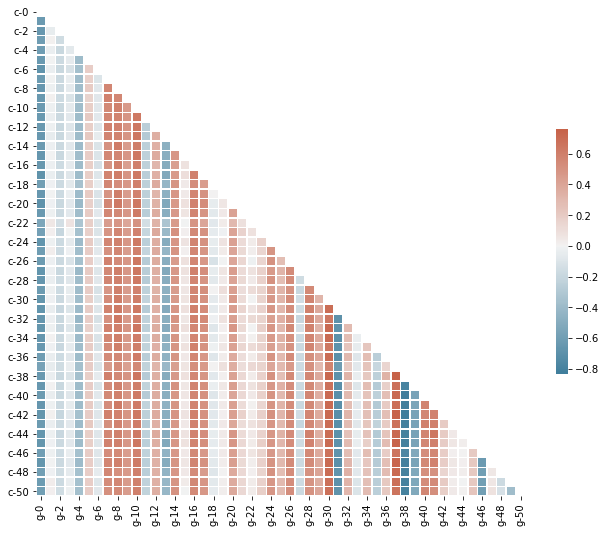

In [ ]:
corr = corre
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

##**Desafio 6: Estudar o código para plotar o heatmap**

In [ ]:
import numpy as np
corr = dados.loc[:,'g-0':'g-50'].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

Primeiro ocorreu a importação da biblioteca numpy, que vai ser usada em uma das linhas do código.
Para plotar o heatmap é feito primeiramente uma correlação com as colunas g-0 até g-50.
Em seguida é feito uma mask com o numpy para deixar apenas o triângulo de baixo da matriz, visto que uma matriz correlação é simétrica. Com o np.ones_like o tipo de resultado é definido como um boolean.
Com o plt.subplots é definido um tamanho para o gráfico que vai ser plotado, e com o sns.diverging_palette é definido as cores e saturações para o heatmap, finalmente, com o sns.heatmap, o gráfico é plotado. 



##**Desafio 7: Resumo**

In [ ]:
Aprendizado da aula 3:

- Conceitos básicos para a utilização do melt
- Fazer heatmaps
- Utilização do crosstab, groupby, loc